# Proyek Klasifikasi Gambar: Plants Type Datasets
- **Nama:** Riffa Putra
- **Email:** m271d5y1712@student.devacademy.id
- **ID Dicoding:** m271d5y1712

## Import Semua Packages/Library yang Digunakan

In [3]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
google-cloud-translate 3.12.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.29.5 

In [36]:
import os
import shutil
import subprocess
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import kagglehub

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from sklearn.metrics import classification_report, confusion_matrix
import tensorflowjs as tfjs

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

## Data Preparation

### Data Loading

In [5]:
# Download dataset using KaggleHub
path = kagglehub.dataset_download("yudhaislamisulistya/plants-type-datasets")
print(f"Path to dataset files: {path}")

# Explore dataset structure
print("DATASET STRUCTURE: ")
for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for file in files[:3]:
        print(f"{subindent}{file}")
    if len(files) > 3:
        print(f"{subindent}... and {len(files) - 3} more files")

# Define path to Train_Set_Folder
train_set_path = os.path.join(path, "split_ttv_dataset_type_of_plants", "Train_Set_Folder")

Path to dataset files: /kaggle/input/plants-type-datasets
DATASET STRUCTURE: 
plants-type-datasets/
  split_ttv_dataset_type_of_plants/
    Test_Set_Folder/
      soybeans/
        aug_0_143.jpg
        aug_0_4184.jpg
        aug_0_7655.jpg
        ... and 96 more files
      orange/
        aug_0_5779.jpg
        aug_0_8472.jpg
        orange938.jpg
        ... and 97 more files
      ginger/
        aug_0_9660.jpg
        aug_0_1485.jpg
        aug_0_3042.jpg
        ... and 97 more files
      galangal/
        aug_0_9591.jpg
        aug_0_6105.jpg
        aug_0_8102.jpg
        ... and 97 more files
      longbeans/
        aug_0_3056.jpg
        aug_0_8706.jpg
        longbeans651.jpg
        ... and 97 more files
      melon/
        aug_0_9974.jpg
        aug_0_3748.jpg
        aug_0_8675.jpg
        ... and 97 more files
      pineapple/
        aug_0_9660.jpg
        aug_0_8300.jpg
        aug_0_2554.jpg
        ... and 97 more files
      coconut/
        aug_0_8232.jpg
     

In [6]:
# Check images count and resolution
def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0
    class_info = {}

    for subdir in sorted(os.listdir(directory)):
        subdir_path = os.path.join(directory, subdir)
        if not os.path.isdir(subdir_path):
            continue

        image_files = [f for f in os.listdir(subdir_path)
                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        num_images = len(image_files)
        print(f"{subdir}: {num_images} images")
        total_images += num_images
        class_info[subdir] = num_images

        # Sample some images to check resolution
        for img_file in image_files[:5]:
            img_path = os.path.join(subdir_path, img_file)
            try:
                with Image.open(img_path) as img:
                    unique_sizes.add(img.size)
            except:
                continue

    print("UNIQUE IMAGE SIZES: ")
    for size in sorted(unique_sizes):
        print(f"- {size[0]}x{size[1]}")

    print(f"\n=== TOTAL IMAGES: {total_images} ===")
    print(f"=== NUMBER OF CLASSES: {len(class_info)} ===")

    return class_info, total_images

print("\n=== ANALYZING DATASET ===")
class_info, total_images = print_images_resolution(train_set_path)


=== ANALYZING DATASET ===
aloevera: 799 images
banana: 799 images
bilimbi: 799 images
cantaloupe: 799 images
cassava: 799 images
coconut: 799 images
corn: 799 images
cucumber: 800 images
curcuma: 799 images
eggplant: 799 images
galangal: 799 images
ginger: 799 images
guava: 799 images
kale: 799 images
longbeans: 799 images
mango: 799 images
melon: 799 images
orange: 799 images
paddy: 799 images
papaya: 799 images
peper chili: 799 images
pineapple: 799 images
pomelo: 799 images
shallot: 799 images
soybeans: 800 images
spinach: 799 images
sweet potatoes: 799 images
tobacco: 799 images
waterapple: 799 images
watermelon: 799 images
UNIQUE IMAGE SIZES: 
- 168x300
- 180x180
- 183x275
- 194x259
- 200x200
- 212x238
- 219x231
- 224x224
- 225x225
- 233x216
- 235x214
- 239x180
- 242x209
- 244x207
- 250x188
- 250x193
- 250x250
- 255x197
- 258x195
- 259x194
- 262x192
- 264x191
- 266x189
- 270x187
- 272x185
- 275x183
- 276x183
- 283x178
- 287x176
- 288x140
- 289x174
- 290x174
- 291x173
- 292x172
- 

### Data Preprocessing

#### Split Dataset

In [7]:
# Create dataset_final directory
dataset_final_path = "dataset_final"
if os.path.exists(dataset_final_path):
    shutil.rmtree(dataset_final_path)

# Create train/val/test directories
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(dataset_final_path, split), exist_ok=True)

# Split ratio: 80% train, 10% val, 10% test
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

In [8]:
for class_name in sorted(os.listdir(train_set_path)):
    class_path = os.path.join(train_set_path, class_name)
    if not os.path.isdir(class_path):
        continue

    # Get all image files
    images = [f for f in os.listdir(class_path)
             if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Shuffle images
    random.shuffle(images)

    # Calculate split indices
    total = len(images)
    train_idx = int(total * train_ratio)
    val_idx = int(total * (train_ratio + val_ratio))

    # Split images
    train_images = images[:train_idx]
    val_images = images[train_idx:val_idx]
    test_images = images[val_idx:]

    # Create class directories in each split
    for split in ['train', 'val', 'test']:
        os.makedirs(os.path.join(dataset_final_path, split, class_name), exist_ok=True)

    # Copy files to respective directories
    for img in train_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(dataset_final_path, 'train', class_name, img)
        shutil.copy2(src, dst)

    for img in val_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(dataset_final_path, 'val', class_name, img)
        shutil.copy2(src, dst)

    for img in test_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(dataset_final_path, 'test', class_name, img)
        shutil.copy2(src, dst)

    print(f"{class_name}: Train={len(train_images)}, Val={len(val_images)}, Test={len(test_images)}")

# Verify final dataset
print("FINAL DATASET VERIFICATION: ")
split_counts = {}
for split in ['train', 'val', 'test']:
    split_path = os.path.join(dataset_final_path, split)
    total = sum([len(os.listdir(os.path.join(split_path, cls)))
                for cls in os.listdir(split_path)])
    split_counts[split] = total
    print(f"{split.upper()}: {total} images")

aloevera: Train=639, Val=80, Test=80
banana: Train=639, Val=80, Test=80
bilimbi: Train=639, Val=80, Test=80
cantaloupe: Train=639, Val=80, Test=80
cassava: Train=639, Val=80, Test=80
coconut: Train=639, Val=80, Test=80
corn: Train=639, Val=80, Test=80
cucumber: Train=640, Val=80, Test=80
curcuma: Train=639, Val=80, Test=80
eggplant: Train=639, Val=80, Test=80
galangal: Train=639, Val=80, Test=80
ginger: Train=639, Val=80, Test=80
guava: Train=639, Val=80, Test=80
kale: Train=639, Val=80, Test=80
longbeans: Train=639, Val=80, Test=80
mango: Train=639, Val=80, Test=80
melon: Train=639, Val=80, Test=80
orange: Train=639, Val=80, Test=80
paddy: Train=639, Val=80, Test=80
papaya: Train=639, Val=80, Test=80
peper chili: Train=639, Val=80, Test=80
pineapple: Train=639, Val=80, Test=80
pomelo: Train=639, Val=80, Test=80
shallot: Train=639, Val=80, Test=80
soybeans: Train=640, Val=80, Test=80
spinach: Train=639, Val=80, Test=80
sweet potatoes: Train=639, Val=80, Test=80
tobacco: Train=639, Val=

aloevera             - Train:  639, Val:   80, Test:   80, Total:  799
banana               - Train:  639, Val:   80, Test:   80, Total:  799
bilimbi              - Train:  639, Val:   80, Test:   80, Total:  799
cantaloupe           - Train:  639, Val:   80, Test:   80, Total:  799
cassava              - Train:  639, Val:   80, Test:   80, Total:  799
coconut              - Train:  639, Val:   80, Test:   80, Total:  799
corn                 - Train:  639, Val:   80, Test:   80, Total:  799
cucumber             - Train:  640, Val:   80, Test:   80, Total:  800
curcuma              - Train:  639, Val:   80, Test:   80, Total:  799
eggplant             - Train:  639, Val:   80, Test:   80, Total:  799
galangal             - Train:  639, Val:   80, Test:   80, Total:  799
ginger               - Train:  639, Val:   80, Test:   80, Total:  799
guava                - Train:  639, Val:   80, Test:   80, Total:  799
kale                 - Train:  639, Val:   80, Test:   80, Total:  799
longbe

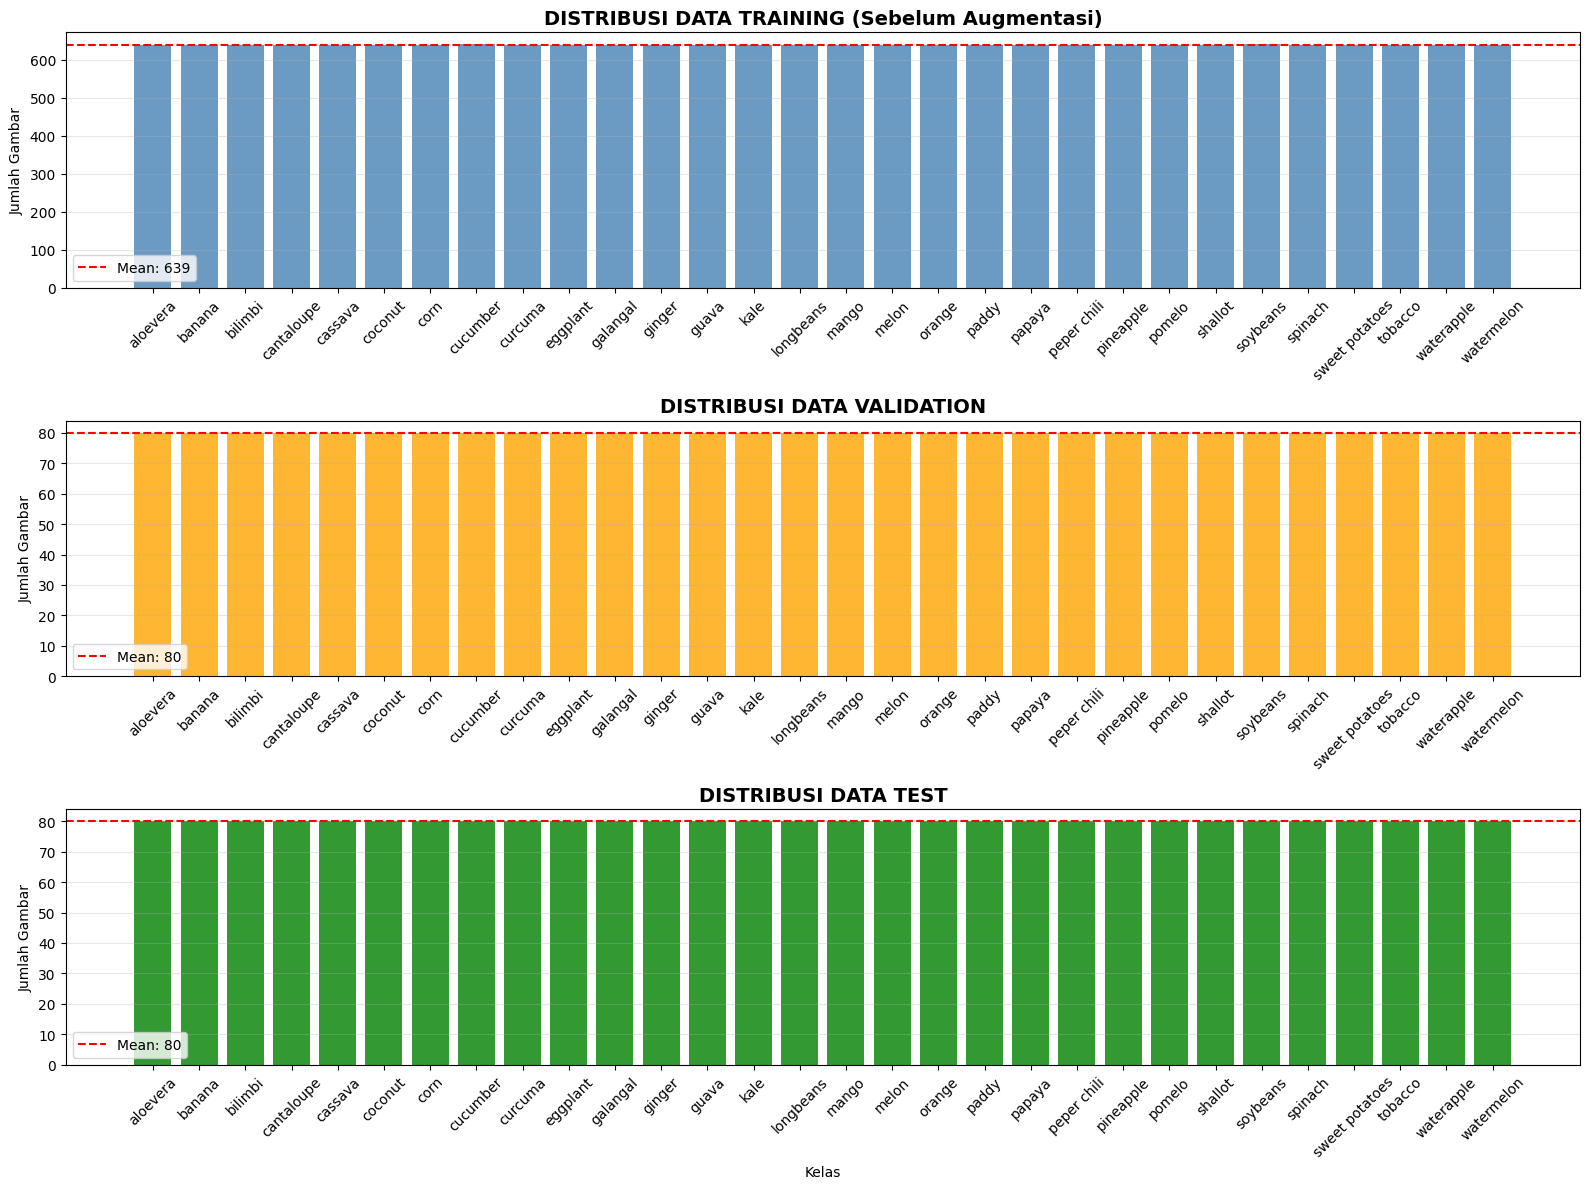

STATISTIK DISTRIBUSI (SEBELUM AUGMENTASI)
Train   - Min: 639, Max: 640, Mean: 639.1, Total: 19172
Val     - Min: 80, Max: 80, Mean: 80.0, Total: 2400
Test    - Min: 80, Max: 80, Mean: 80.0, Total: 2400
TOTAL   - 23972 images


In [9]:
# VISUALISASI DISTRIBUSI DATA SEBELUM AUGMENTASI

# Collect data distribution
train_dist = {}
val_dist = {}
test_dist = {}

for class_name in sorted(os.listdir(os.path.join(dataset_final_path, 'train'))):
    train_count = len(os.listdir(os.path.join(dataset_final_path, 'train', class_name)))
    val_count = len(os.listdir(os.path.join(dataset_final_path, 'val', class_name)))
    test_count = len(os.listdir(os.path.join(dataset_final_path, 'test', class_name)))

    train_dist[class_name] = train_count
    val_dist[class_name] = val_count
    test_dist[class_name] = test_count

    print(f"{class_name:20} - Train: {train_count:4}, Val: {val_count:4}, Test: {test_count:4}, Total: {train_count+val_count+test_count:4}")

# Plot distribusi sebelum augmentasi
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

classes = list(train_dist.keys())
train_values = list(train_dist.values())
val_values = list(val_dist.values())
test_values = list(test_dist.values())

# Train distribution
axes[0].bar(classes, train_values, color='steelblue', alpha=0.8)
axes[0].set_title('DISTRIBUSI DATA TRAINING (Sebelum Augmentasi)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Jumlah Gambar')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(y=np.mean(train_values), color='red', linestyle='--',
                label=f'Mean: {np.mean(train_values):.0f}')
axes[0].legend()

# Validation distribution
axes[1].bar(classes, val_values, color='orange', alpha=0.8)
axes[1].set_title('DISTRIBUSI DATA VALIDATION', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Jumlah Gambar')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(y=np.mean(val_values), color='red', linestyle='--',
                label=f'Mean: {np.mean(val_values):.0f}')
axes[1].legend()

# Test distribution
axes[2].bar(classes, test_values, color='green', alpha=0.8)
axes[2].set_title('DISTRIBUSI DATA TEST', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Jumlah Gambar')
axes[2].set_xlabel('Kelas')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)
axes[2].axhline(y=np.mean(test_values), color='red', linestyle='--',
                label=f'Mean: {np.mean(test_values):.0f}')
axes[2].legend()

plt.tight_layout()
plt.show()

# Summary statistics
print(f"STATISTIK DISTRIBUSI (SEBELUM AUGMENTASI)")
print(f"Train   - Min: {min(train_values)}, Max: {max(train_values)}, Mean: {np.mean(train_values):.1f}, Total: {sum(train_values)}")
print(f"Val     - Min: {min(val_values)}, Max: {max(val_values)}, Mean: {np.mean(val_values):.1f}, Total: {sum(val_values)}")
print(f"Test    - Min: {min(test_values)}, Max: {max(test_values)}, Mean: {np.mean(test_values):.1f}, Total: {sum(test_values)}")
print(f"TOTAL   - {sum(train_values) + sum(val_values) + sum(test_values)} images")

### Data Augmentation

In [10]:
# Image parameters
IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_final_path, 'train'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    os.path.join(dataset_final_path, 'val'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    os.path.join(dataset_final_path, 'test'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Get class names
class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)
print(f"\n=== NUMBER OF CLASSES: {num_classes} ===")
print(f"Classes: {class_names}")

# Save class labels
with open('label.txt', 'w') as f:
    for i, class_name in enumerate(class_names):
        f.write(f"{i} {class_name}\n")

Found 19172 images belonging to 30 classes.
Found 2400 images belonging to 30 classes.
Found 2400 images belonging to 30 classes.

=== NUMBER OF CLASSES: 30 ===
Classes: ['aloevera', 'banana', 'bilimbi', 'cantaloupe', 'cassava', 'coconut', 'corn', 'cucumber', 'curcuma', 'eggplant', 'galangal', 'ginger', 'guava', 'kale', 'longbeans', 'mango', 'melon', 'orange', 'paddy', 'papaya', 'peper chili', 'pineapple', 'pomelo', 'shallot', 'soybeans', 'spinach', 'sweet potatoes', 'tobacco', 'waterapple', 'watermelon']


Mengambil 1 gambar dan menampilkan 8 variasi augmentasi...
Found 19172 images belonging to 30 classes.


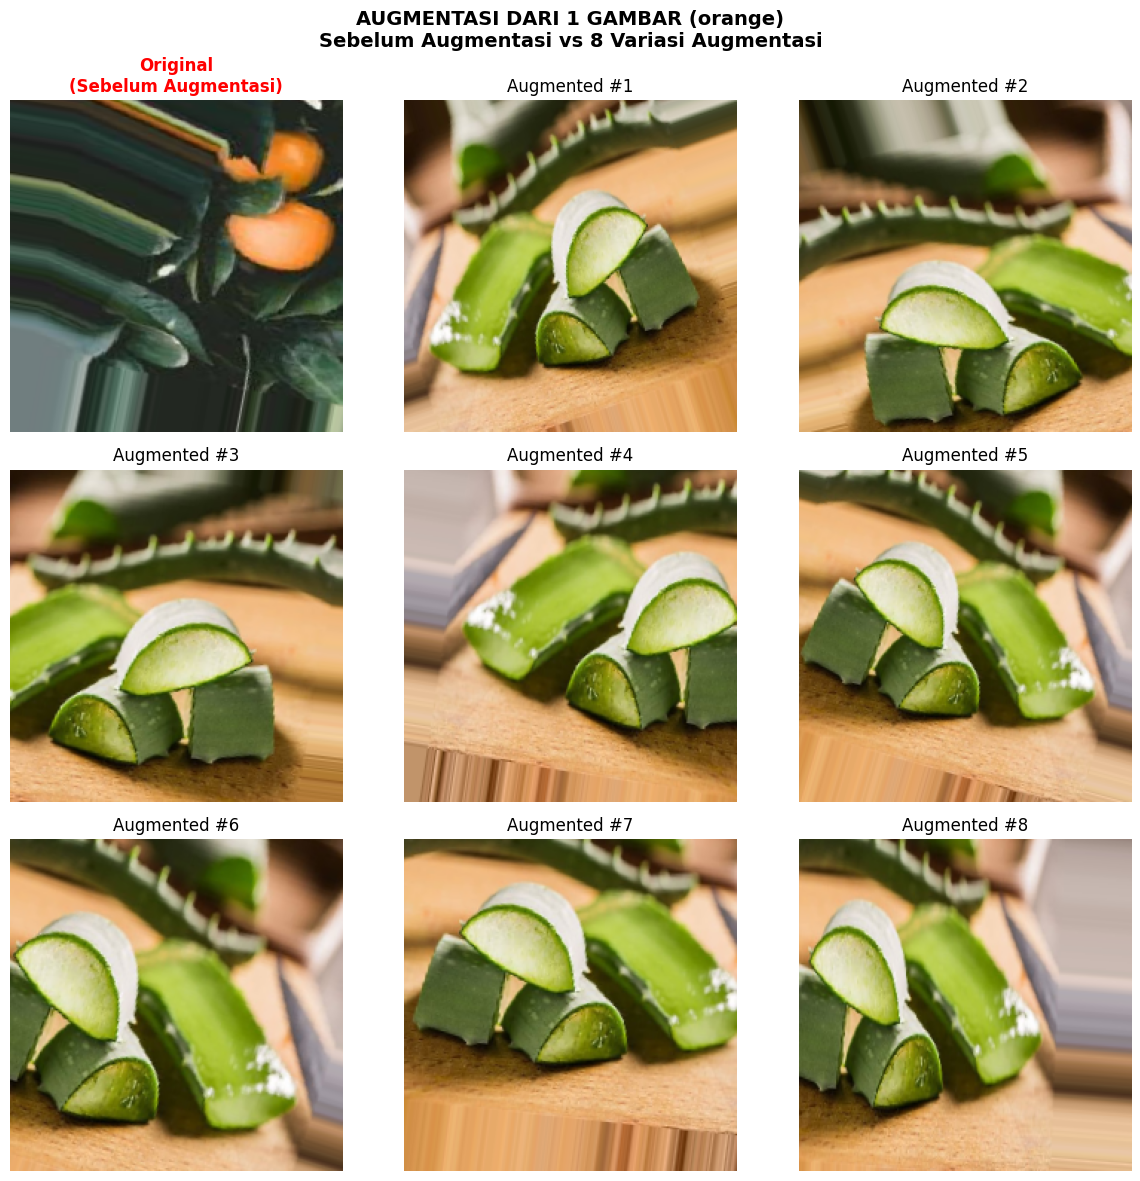

In [11]:
# SIMULASI AUGMENTASI & VISUALISASI DISTRIBUSI SETELAH AUGMENTASI

print("Mengambil 1 gambar dan menampilkan 8 variasi augmentasi...")

# Get one image
temp_gen = train_datagen.flow_from_directory(
    os.path.join(dataset_final_path, 'train'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='categorical',
    shuffle=True
)

sample_img, sample_label = next(temp_gen)
label_idx = np.argmax(sample_label[0])
class_name = class_names[label_idx]

# Generate augmented versions
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle(f'AUGMENTASI DARI 1 GAMBAR ({class_name})\nSebelum Augmentasi vs 8 Variasi Augmentasi',
             fontsize=14, fontweight='bold')

# Original image (before augmentation)
axes[0, 0].imshow(sample_img[0])
axes[0, 0].set_title('Original\n(Sebelum Augmentasi)', fontweight='bold', color='red')
axes[0, 0].axis('off')

# Reset generator to get original image path
temp_gen.reset()
original_paths = temp_gen.filepaths[:1]

# Load original image and apply augmentation manually
original_img = load_img(original_paths[0], target_size=(IMG_SIZE, IMG_SIZE))
original_array = img_to_array(original_img)
original_array = np.expand_dims(original_array, axis=0)

# Generate 8 augmented versions
augmentation_gen = train_datagen.flow(original_array, batch_size=1)

for i in range(8):
    augmented_img = next(augmentation_gen)[0]
    row = (i + 1) // 3
    col = (i + 1) % 3
    axes[row, col].imshow(augmented_img)
    axes[row, col].set_title(f'Augmented #{i+1}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


=== VISUALIZING SAMPLE IMAGES ===


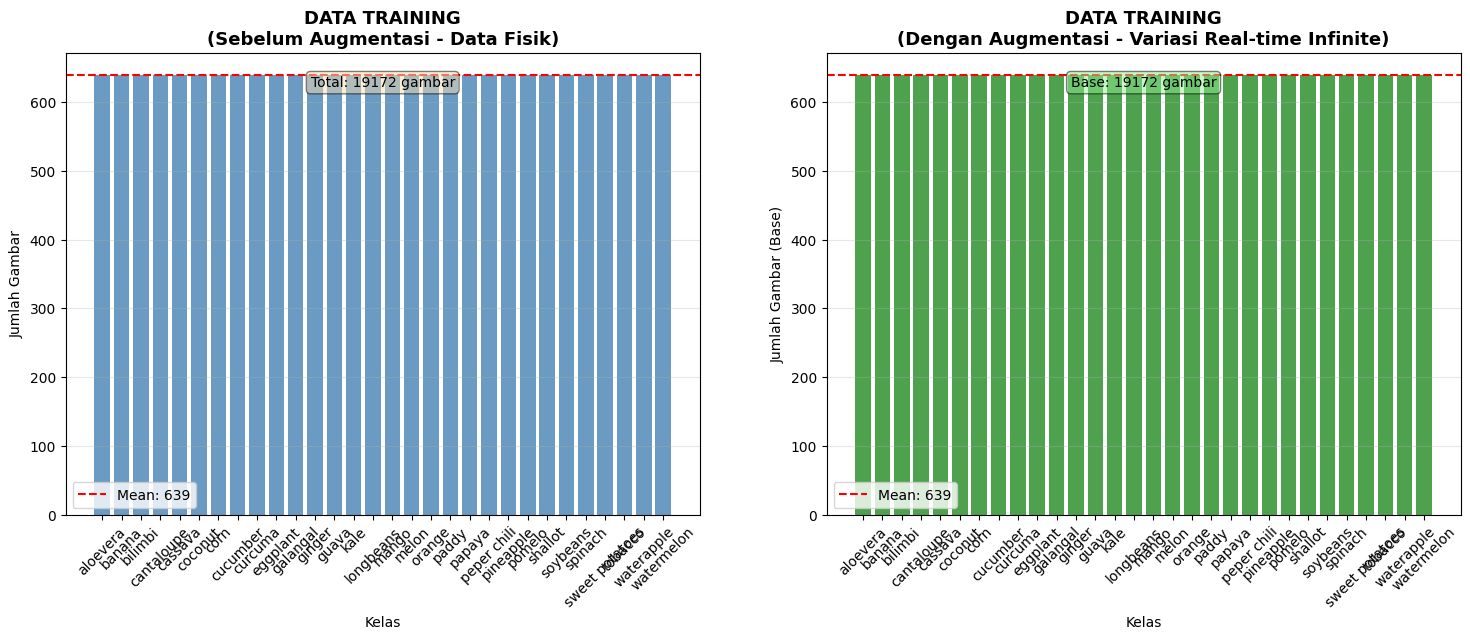

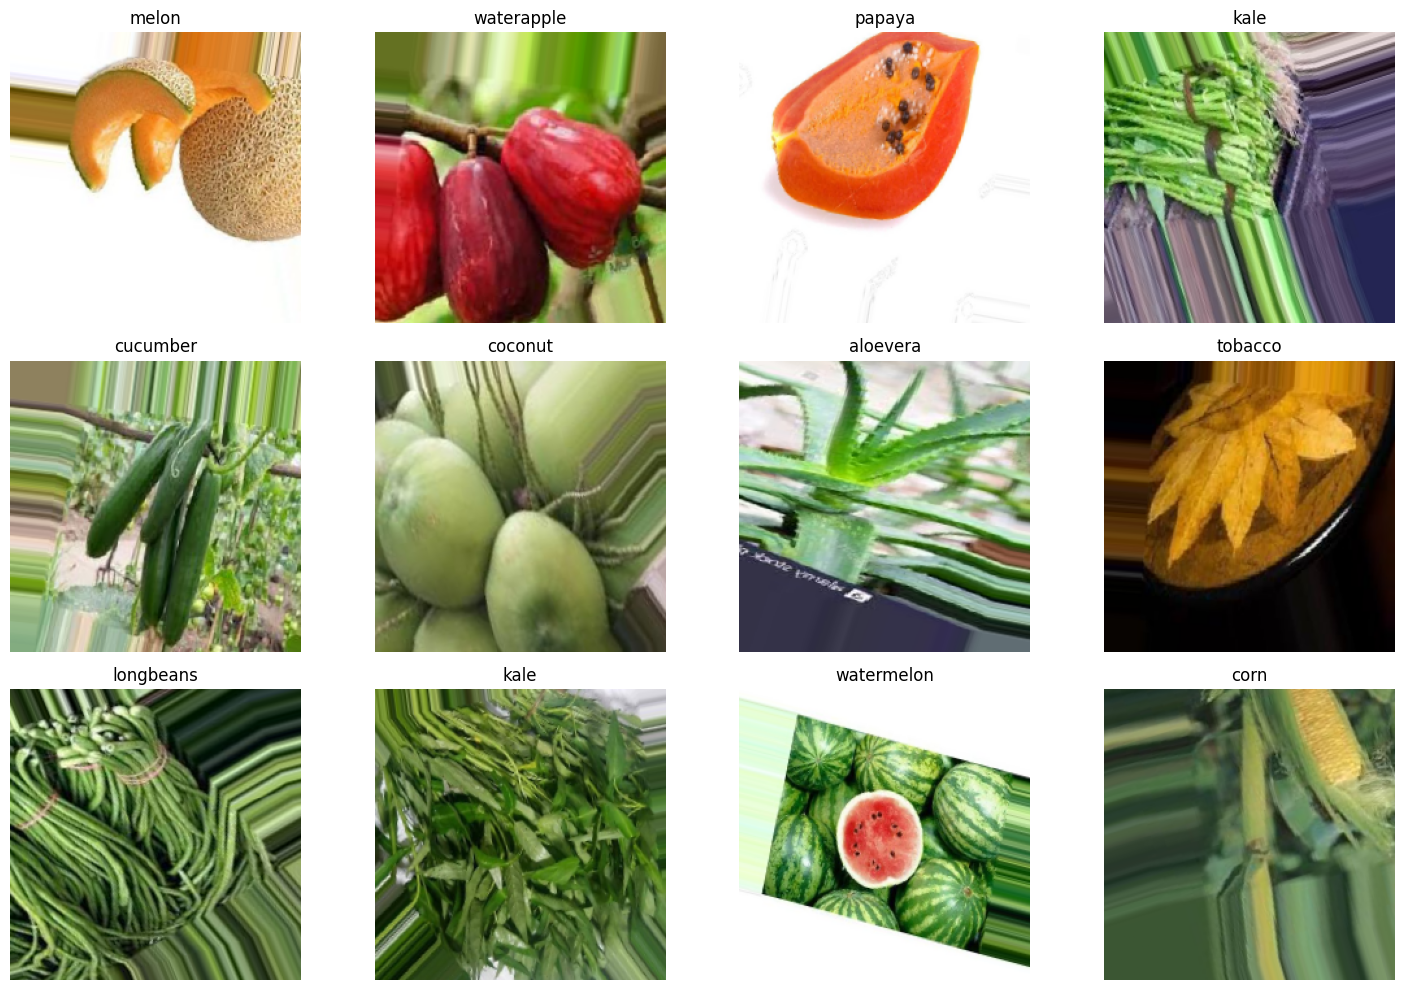

In [12]:
# PERBANDINGAN DISTRIBUSI SEBELUM VS SETELAH AUGMENTASI

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Before augmentation
axes[0].bar(classes, train_values, color='steelblue', alpha=0.8)
axes[0].set_title('DATA TRAINING\n(Sebelum Augmentasi - Data Fisik)',
                  fontsize=13, fontweight='bold')
axes[0].set_ylabel('Jumlah Gambar')
axes[0].set_xlabel('Kelas')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(y=np.mean(train_values), color='red', linestyle='--',
                label=f'Mean: {np.mean(train_values):.0f}')
axes[0].legend()
axes[0].text(0.5, 0.95, f'Total: {sum(train_values)} gambar',
             transform=axes[0].transAxes, ha='center', va='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# After augmentation
axes[1].bar(classes, train_values, color='forestgreen', alpha=0.8)
axes[1].set_title('DATA TRAINING\n(Dengan Augmentasi - Variasi Real-time Infinite)',
                  fontsize=13, fontweight='bold')
axes[1].set_ylabel('Jumlah Gambar (Base)')
axes[1].set_xlabel('Kelas')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(y=np.mean(train_values), color='red', linestyle='--',
                label=f'Mean: {np.mean(train_values):.0f}')
axes[1].legend()
axes[1].text(0.5, 0.95, f'Base: {sum(train_values)} gambar',
             transform=axes[1].transAxes, ha='center', va='top',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

# Visualize sample images
print("\n=== VISUALIZING SAMPLE IMAGES ===")
plt.figure(figsize=(15, 10))
sample_images, sample_labels = next(train_generator)

for i in range(min(12, len(sample_images))):
    plt.subplot(3, 4, i + 1)
    plt.imshow(sample_images[i])
    label_idx = np.argmax(sample_labels[i])
    plt.title(class_names[label_idx])
    plt.axis('off')

plt.tight_layout()
plt.savefig('sample_images.png', dpi=150, bbox_inches='tight')
plt.show()

## Modelling

In [13]:
# Load pre-trained MobileNetV2
base_model = MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

I0000 00:00:1763394665.733609      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1763394665.734305      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
# Build Sequential model
model = models.Sequential([
    # Input layer
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    # MobileNetV2 base
    base_model,

    # Conv2D layers
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    # Pooling layer
    layers.GlobalAveragePooling2D(),

    # Deeper Dense layers
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),

    # Output layer
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("=== MODEL ARCHITECTURE ===")
model.summary()

=== MODEL ARCHITECTURE ===


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 7, 7, 512)      │     5,898,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │         7,710 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,268,766 (39.17 MB)

 Trainable params: 8,008,222 (30.55 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

In [15]:
# Count trainable parameters
trainable_params = sum([tf.size(w).numpy() for w in model.trainable_weights])
non_trainable_params = sum([tf.size(w).numpy() for w in model.non_trainable_weights])
total_params = trainable_params + non_trainable_params

print(f"=== PARAMETER COUNT ===")
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"Non-trainable parameters: {non_trainable_params:,}")
print(f"Percentage trainable: {(trainable_params/total_params)*100:.2f}%")

=== PARAMETER COUNT ===
Total parameters: 10,268,766
Trainable parameters: 8,008,222
Non-trainable parameters: 2,260,544
Percentage trainable: 77.99%


In [16]:
# Setup callbacks
callbacks_phase1 = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=4,
        restore_best_weights=True,
        mode='max',
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'best_model_phase1.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
]

In [17]:
# Train model
EPOCHS_PHASE1 = 8

history_phase1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS_PHASE1,
    callbacks=callbacks_phase1,
    verbose=1
)

print("\n✓ Training Phase 1 completed!")
print(f"✓ Best training accuracy: {max(history_phase1.history['accuracy'])*100:.2f}%")
print(f"✓ Best validation accuracy: {max(history_phase1.history['val_accuracy'])*100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8


I0000 00:00:1763394676.376745     173 service.cc:148] XLA service 0x7b722c012870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763394676.378219     173 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1763394676.378244     173 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1763394677.601037     173 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/600 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.0859 - loss: 4.2989   

I0000 00:00:1763394686.365533     173 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.4517 - loss: 2.0516
Epoch 1: val_accuracy improved from -inf to 0.77375, saving model to best_model_phase1.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 256s 399ms/step - accuracy: 0.4519 - loss: 2.0506 - val_accuracy: 0.7738 - val_loss: 0.7634 - learning_rate: 0.0010
Epoch 2/8
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.7549 - loss: 0.8558
Epoch 2: val_accuracy improved from 0.77375 to 0.84500, saving model to best_model_phase1.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 227s 379ms/step - accuracy: 0.7549 - loss: 0.8557 - val_accuracy: 0.8450 - val_loss: 0.5330 - learning_rate: 0.0010
Epoch 3/8
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.8095 - loss: 0.6400
Epoch 3: val_accuracy improved from 0.84500 to 0.86708, saving model to best_model_phase1.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 227s 379ms/step - accuracy: 0.8095 - loss: 0.6400 - val_accuracy: 0.8671 - val_loss: 0.4343 - learning_rate: 0.0010
Epoch 4/8
600/600 ━━━━━━━━━━━

In [18]:
# PHASE 2: Fine-tuning with unfrozen layers

base_model.trainable = True

fine_tune_at = len(base_model.layers) - 50
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile with lower learning rate for fine-tuning
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
# Setup callbacks for phase 2
callbacks_phase2 = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        mode='max',
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,
        patience=3,
        min_lr=1e-8,
        verbose=1
    ),
    ModelCheckpoint(
        'best_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
]

In [20]:
trainable_params = sum([tf.size(w).numpy() for w in model.trainable_weights])
non_trainable_params = sum([tf.size(w).numpy() for w in model.non_trainable_weights])
total_params = trainable_params + non_trainable_params

print(f"=== PARAMETER COUNT (PHASE 2) ===")
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"Non-trainable parameters: {non_trainable_params:,}")
print(f"Percentage trainable: {(trainable_params/total_params)*100:.2f}%")

=== PARAMETER COUNT (PHASE 2) ===
Total parameters: 10,268,766
Trainable parameters: 9,863,326
Non-trainable parameters: 405,440
Percentage trainable: 96.05%


In [21]:
# Train model (Phase 2)

EPOCHS_PHASE2 = 12

history_phase2 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS_PHASE2,
    callbacks=callbacks_phase2,
    verbose=1
)

print("\n✓ Training Phase 2 completed!")
print(f"✓ Best training accuracy: {max(history_phase2.history['accuracy'])*100:.2f}%")
print(f"✓ Best validation accuracy: {max(history_phase2.history['val_accuracy'])*100:.2f}%")

Epoch 1/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.8261 - loss: 0.6416
Epoch 1: val_accuracy improved from -inf to 0.92708, saving model to best_model.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 258s 390ms/step - accuracy: 0.8261 - loss: 0.6414 - val_accuracy: 0.9271 - val_loss: 0.2379 - learning_rate: 5.0000e-05
Epoch 2/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.8990 - loss: 0.3400
Epoch 2: val_accuracy improved from 0.92708 to 0.94417, saving model to best_model.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 221s 368ms/step - accuracy: 0.8990 - loss: 0.3400 - val_accuracy: 0.9442 - val_loss: 0.1585 - learning_rate: 5.0000e-05
Epoch 3/12
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9182 - loss: 0.2608
Epoch 3: val_accuracy improved from 0.94417 to 0.95500, saving model to best_model.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 224s 373ms/step - accuracy: 0.9182 - loss: 0.2608 - val_accuracy: 0.9550 - val_loss: 0.1428 - learning_rate: 5.0000e-05
Epoch 4/12
600/600 ━━━━━━

In [22]:
# Combine histories for visualization
history = {
    'accuracy': history_phase1.history['accuracy'] + history_phase2.history['accuracy'],
    'val_accuracy': history_phase1.history['val_accuracy'] + history_phase2.history['val_accuracy'],
    'loss': history_phase1.history['loss'] + history_phase2.history['loss'],
    'val_loss': history_phase1.history['val_loss'] + history_phase2.history['val_loss']
}

## Evaluasi dan Visualisasi

In [23]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Evaluate on training set
train_loss, train_accuracy = model.evaluate(train_generator, verbose=1)
print(f"\nTrain Accuracy: {train_accuracy*100:.2f}%")
print(f"Train Loss: {train_loss:.4f}") 

75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.9692 - loss: 0.0747
Test Accuracy: 97.67%
Test Loss: 0.0629
600/600 ━━━━━━━━━━━━━━━━━━━━ 223s 372ms/step - accuracy: 0.9872 - loss: 0.0347

Train Accuracy: 98.77%
Train Loss: 0.0349


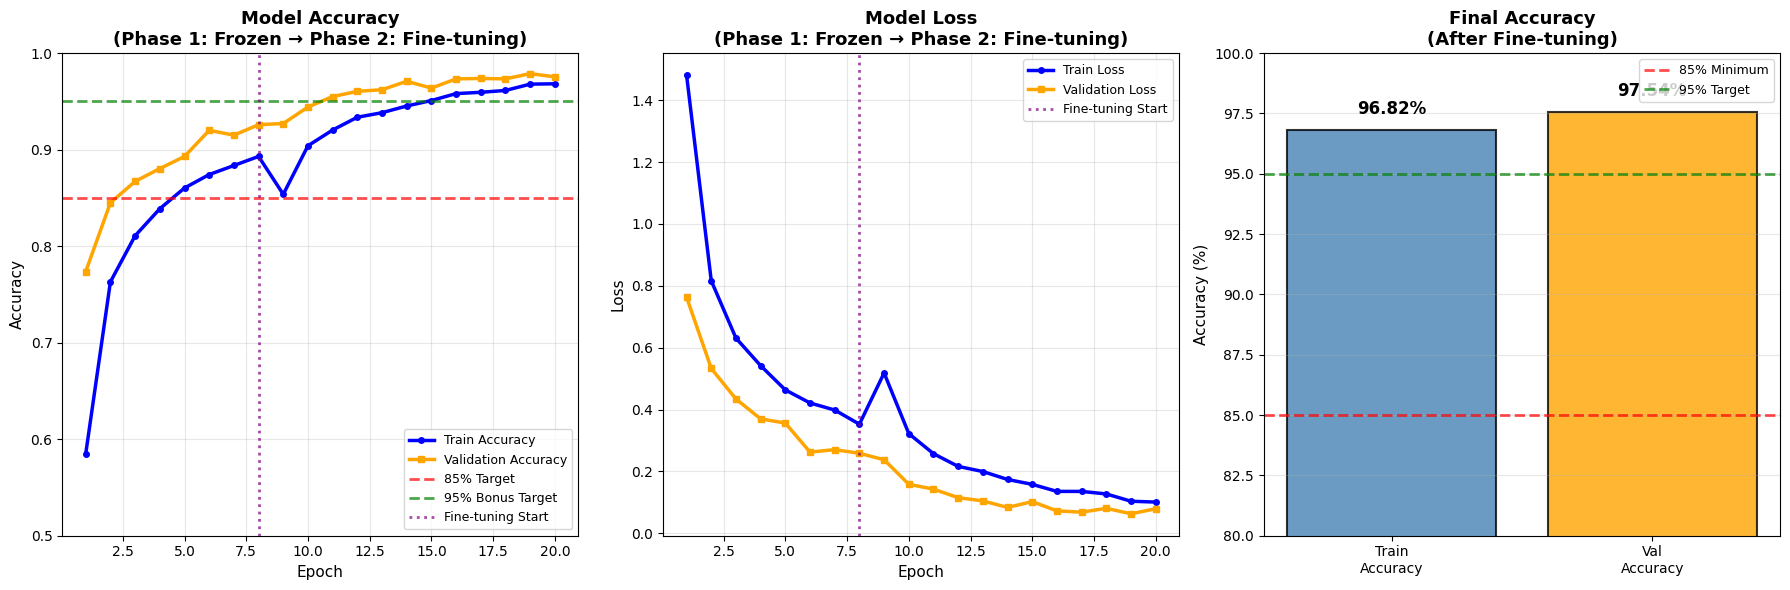

In [24]:
fig = plt.figure(figsize=(18, 6))

# Plot Accuracy
ax1 = plt.subplot(1, 3, 1)
epochs_range = range(1, len(history['accuracy']) + 1)
ax1.plot(epochs_range, history['accuracy'], label='Train Accuracy', linewidth=2.5, marker='o', markersize=4, color='blue')
ax1.plot(epochs_range, history['val_accuracy'], label='Validation Accuracy', linewidth=2.5, marker='s', markersize=4, color='orange')
ax1.axhline(y=0.85, color='red', linestyle='--', label='85% Target', alpha=0.7, linewidth=2)
ax1.axhline(y=0.95, color='green', linestyle='--', label='95% Bonus Target', alpha=0.7, linewidth=2)
ax1.axvline(x=EPOCHS_PHASE1, color='purple', linestyle=':', label='Fine-tuning Start', alpha=0.7, linewidth=2)
ax1.set_title('Model Accuracy\n(Phase 1: Frozen → Phase 2: Fine-tuning)', fontsize=13, fontweight='bold')
ax1.set_xlabel('Epoch', fontsize=11)
ax1.set_ylabel('Accuracy', fontsize=11)
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0.5, 1.0])

# Plot Loss
ax2 = plt.subplot(1, 3, 2)
ax2.plot(epochs_range, history['loss'], label='Train Loss', linewidth=2.5, marker='o', markersize=4, color='blue')
ax2.plot(epochs_range, history['val_loss'], label='Validation Loss', linewidth=2.5, marker='s', markersize=4, color='orange')
ax2.axvline(x=EPOCHS_PHASE1, color='purple', linestyle=':', label='Fine-tuning Start', alpha=0.7, linewidth=2)
ax2.set_title('Model Loss\n(Phase 1: Frozen → Phase 2: Fine-tuning)', fontsize=13, fontweight='bold')
ax2.set_xlabel('Epoch', fontsize=11)
ax2.set_ylabel('Loss', fontsize=11)
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot Accuracy Comparison Bar Chart
ax3 = plt.subplot(1, 3, 3)
metrics = ['Train\nAccuracy', 'Val\nAccuracy']
final_values = [history['accuracy'][-1]*100, history['val_accuracy'][-1]*100]
colors_bar = ['steelblue', 'orange']
bars = ax3.bar(metrics, final_values, color=colors_bar, alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar, value in zip(bars, final_values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{value:.2f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax3.axhline(y=85, color='red', linestyle='--', label='85% Minimum', linewidth=2, alpha=0.7)
ax3.axhline(y=95, color='green', linestyle='--', label='95% Target', linewidth=2, alpha=0.7)
ax3.set_ylabel('Accuracy (%)', fontsize=11)
ax3.set_title('Final Accuracy\n(After Fine-tuning)', fontsize=13, fontweight='bold')
ax3.set_ylim([80, 100])
ax3.legend(fontsize=9)
ax3.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step
=== CLASSIFICATION REPORT ===
                precision    recall  f1-score   support

      aloevera       0.99      1.00      0.99        80
        banana       1.00      0.99      0.99        80
       bilimbi       1.00      0.97      0.99        80
    cantaloupe       0.83      0.75      0.79        80
       cassava       1.00      1.00      1.00        80
       coconut       0.94      0.97      0.96        80
          corn       1.00      1.00      1.00        80
      cucumber       1.00      0.99      0.99        80
       curcuma       0.98      1.00      0.99        80
      eggplant       1.00      0.97      0.99        80
      galangal       1.00      0.99      0.99        80
        ginger       1.00      0.97      0.99        80
         guava       1.00      0.99      0.99        80
          kale       0.97      0.96      0.97        80
     longbeans       1.00      0.97      0.99        80
         mango       0.98      0.

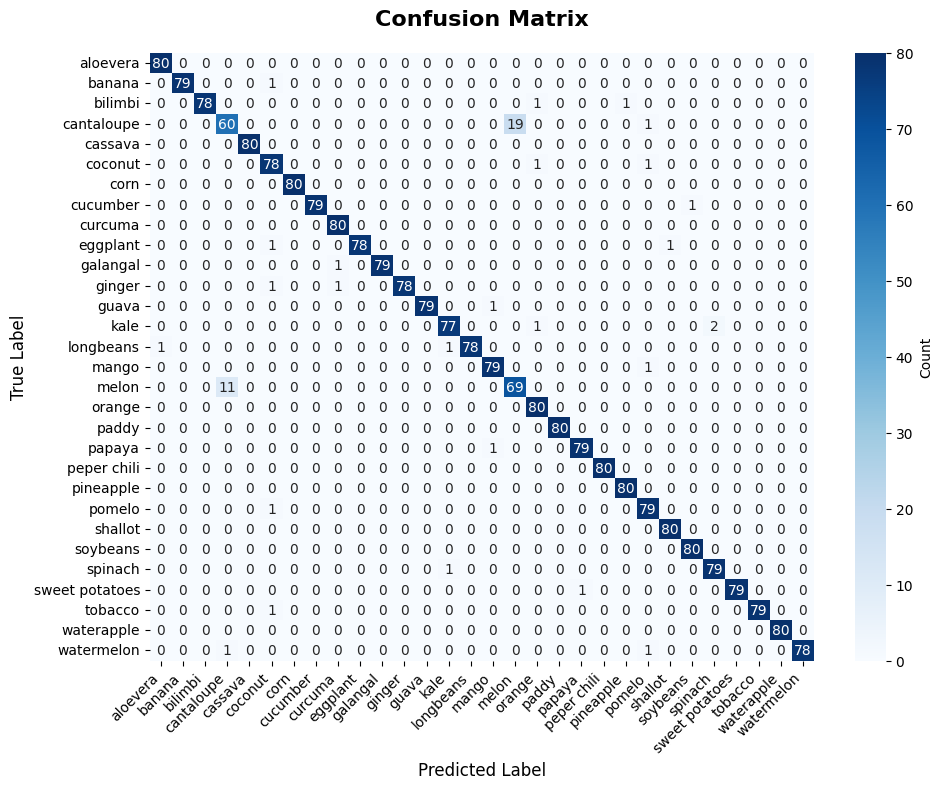

In [25]:
# Get predictions
test_generator.reset()
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# Classification Report
print("=== CLASSIFICATION REPORT ===")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

## Konversi Model

In [33]:
save_path = 'saved_model/'

# Hapus direktori lama
if os.path.exists(save_path):
    shutil.rmtree(save_path)

# Save model
tf.saved_model.save(model, save_path)
print("✓ SavedModel berhasil disimpan!")
print(f"   Lokasi: {save_path}")

# Verifikasi struktur
print("\n   Struktur SavedModel:")
for root, dirs, files in os.walk(save_path):
    level = root.replace(save_path, '').count(os.sep)
    indent = ' ' * 4 * (level + 1)
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 2)
    for file in files:
        print(f"{subindent}{file}")

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


✓ SavedModel berhasil disimpan!
   Lokasi: saved_model/

   Struktur SavedModel:
    /
        saved_model.pb
        fingerprint.pb
    assets/
    variables/
        variables.index
        variables.data-00000-of-00001


In [34]:
# Buat direktori tflite
tflite_dir = 'tflite/'
if os.path.exists(tflite_dir):
    shutil.rmtree(tflite_dir)
os.makedirs(tflite_dir)

# Konversi dari SavedModel 
converter = tf.lite.TFLiteConverter.from_saved_model(save_path)

tflite_model = converter.convert()

# Simpan model TFLite
tflite_model_path = os.path.join(tflite_dir, 'model.tflite')
with tf.io.gfile.GFile(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print("✓ TFLite model berhasil disimpan!")
print(f"   Lokasi: {tflite_model_path}")
print(f"   Ukuran: {os.path.getsize(tflite_model_path) / (1024*1024):.2f} MB")

# Copy label.txt ke direktori tflite
if os.path.exists('label.txt'):
    shutil.copy('label.txt', os.path.join(tflite_dir, 'label.txt'))

W0000 00:00:1763400842.273941      48 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1763400842.273999      48 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


✓ TFLite model berhasil disimpan!
   Lokasi: tflite/model.tflite
   Ukuran: 0.21 MB


In [37]:
tfjs_dir = 'tfjs_model/'
if os.path.exists(tfjs_dir):
    shutil.rmtree(tfjs_dir)

result = subprocess.run(
    [
        'tensorflowjs_converter',
        '--input_format=tf_saved_model',
        save_path,
        tfjs_dir
    ],
    check=True,
    capture_output=True,
    text=True
)
print("✓ TensorFlow.js model berhasil disimpan!")
print(f"   Lokasi: {tfjs_dir}")

✓ TensorFlow.js model berhasil disimpan!
   Lokasi: tfjs_model/


## Inference (Optional)

In [47]:
# INFERENCE MENGGUNAKAN SAVED MODEL

# Load SavedModel
print("\nLoading SavedModel...")
model = tf.saved_model.load('saved_model/')
print("✓ SavedModel berhasil dimuat!")

# Get inference function
infer = model.signatures['serving_default']
print(f"\n   Input signature: {infer.structured_input_signature}")
print(f"   Output signature: {infer.structured_outputs}")


# Load label mapping
print("\nLoading label mapping...")
class_names = []
with open('label.txt', 'r') as f:
    for line in f:
        parts = line.strip().split(' ', 1)
        if len(parts) == 2:
            class_names.append(parts[1])
        else:
            class_names.append(parts[0])

print(f"✓ Label berhasil dimuat!")
print(f"   Jumlah kelas: {len(class_names)}")
print(f"   Kelas: {class_names}")


# FUNGSI PREPROCESSING DAN INFERENCE
def preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img, dtype=np.float32)
    img_array = img_array / 255.0 
    img_array = np.expand_dims(img_array, axis=0)  
    return img_array, img

def predict_image(model_infer, image_array, class_names):
    # Convert to tensor
    input_tensor = tf.constant(image_array, dtype=tf.float32)
    
    # Run inference
    predictions = model_infer(input_tensor)
    
    # Get prediction output
    if isinstance(predictions, dict):
        # Ambil output pertama dari dictionary
        pred_key = list(predictions.keys())[0]
        predictions = predictions[pred_key].numpy()[0]
    else:
        predictions = predictions.numpy()[0]
    
    # Get top prediction
    predicted_idx = np.argmax(predictions)
    predicted_class = class_names[predicted_idx]
    confidence = predictions[predicted_idx] * 100
    
    # Get top 3 predictions
    top3_idx = np.argsort(predictions)[-3:][::-1]
    top3_predictions = [(class_names[idx], predictions[idx] * 100) for idx in top3_idx]
    
    return predicted_class, confidence, top3_predictions


# AMBIL SAMPEL GAMBAR DARI BERBAGAI KELAS
print("\nMengambil sampel gambar dari test set...")

test_dir = 'dataset_final/test'
sample_images = []

# Ambil 2 gambar dari setiap kelas (total akan bervariasi)
for class_name in class_names:
    class_path = os.path.join(test_dir, class_name)
    if os.path.exists(class_path):
        images = [f for f in os.listdir(class_path) 
                 if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        # Ambil 2 gambar random dari setiap kelas
        selected = random.sample(images, min(2, len(images)))
        for img_name in selected:
            sample_images.append({
                'path': os.path.join(class_path, img_name),
                'true_label': class_name
            })

# Shuffle dan ambil 12 gambar untuk visualisasi
random.shuffle(sample_images)
sample_images = sample_images[:12]

print(f"✓ Terpilih {len(sample_images)} gambar untuk inference")


# LAKUKAN INFERENCE
print("\nMelakukan inference pada sampel gambar...")

results = []

for idx, sample in enumerate(sample_images):
    # Preprocess
    img_array, original_img = preprocess_image(sample['path'])
    
    # Predict
    pred_class, confidence, top3 = predict_image(infer, img_array, class_names)
    
    # Simpan hasil
    results.append({
        'image': original_img,
        'true_label': sample['true_label'],
        'pred_label': pred_class,
        'confidence': confidence,
        'top3': top3,
        'correct': pred_class == sample['true_label']
    })
    
    print(f"   [{idx+1}/{len(sample_images)}] Processed: {sample['true_label']} -> {pred_class} ({confidence:.2f}%)")

print("✓ Inference selesai!")


Loading SavedModel...
✓ SavedModel berhasil dimuat!

   Input signature: ((), {'inputs': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')})
   Output signature: {'output_0': TensorSpec(shape=(None, 30), dtype=tf.float32, name='output_0')}

Loading label mapping...
✓ Label berhasil dimuat!
   Jumlah kelas: 30
   Kelas: ['aloevera', 'banana', 'bilimbi', 'cantaloupe', 'cassava', 'coconut', 'corn', 'cucumber', 'curcuma', 'eggplant', 'galangal', 'ginger', 'guava', 'kale', 'longbeans', 'mango', 'melon', 'orange', 'paddy', 'papaya', 'peper chili', 'pineapple', 'pomelo', 'shallot', 'soybeans', 'spinach', 'sweet potatoes', 'tobacco', 'waterapple', 'watermelon']

Mengambil sampel gambar dari test set...
✓ Terpilih 12 gambar untuk inference

Melakukan inference pada sampel gambar...
   [1/12] Processed: pineapple -> pineapple (99.04%)
   [2/12] Processed: pomelo -> pomelo (100.00%)
   [3/12] Processed: eggplant -> eggplant (100.00%)
   [4/12] Processed: longbeans -> longbea

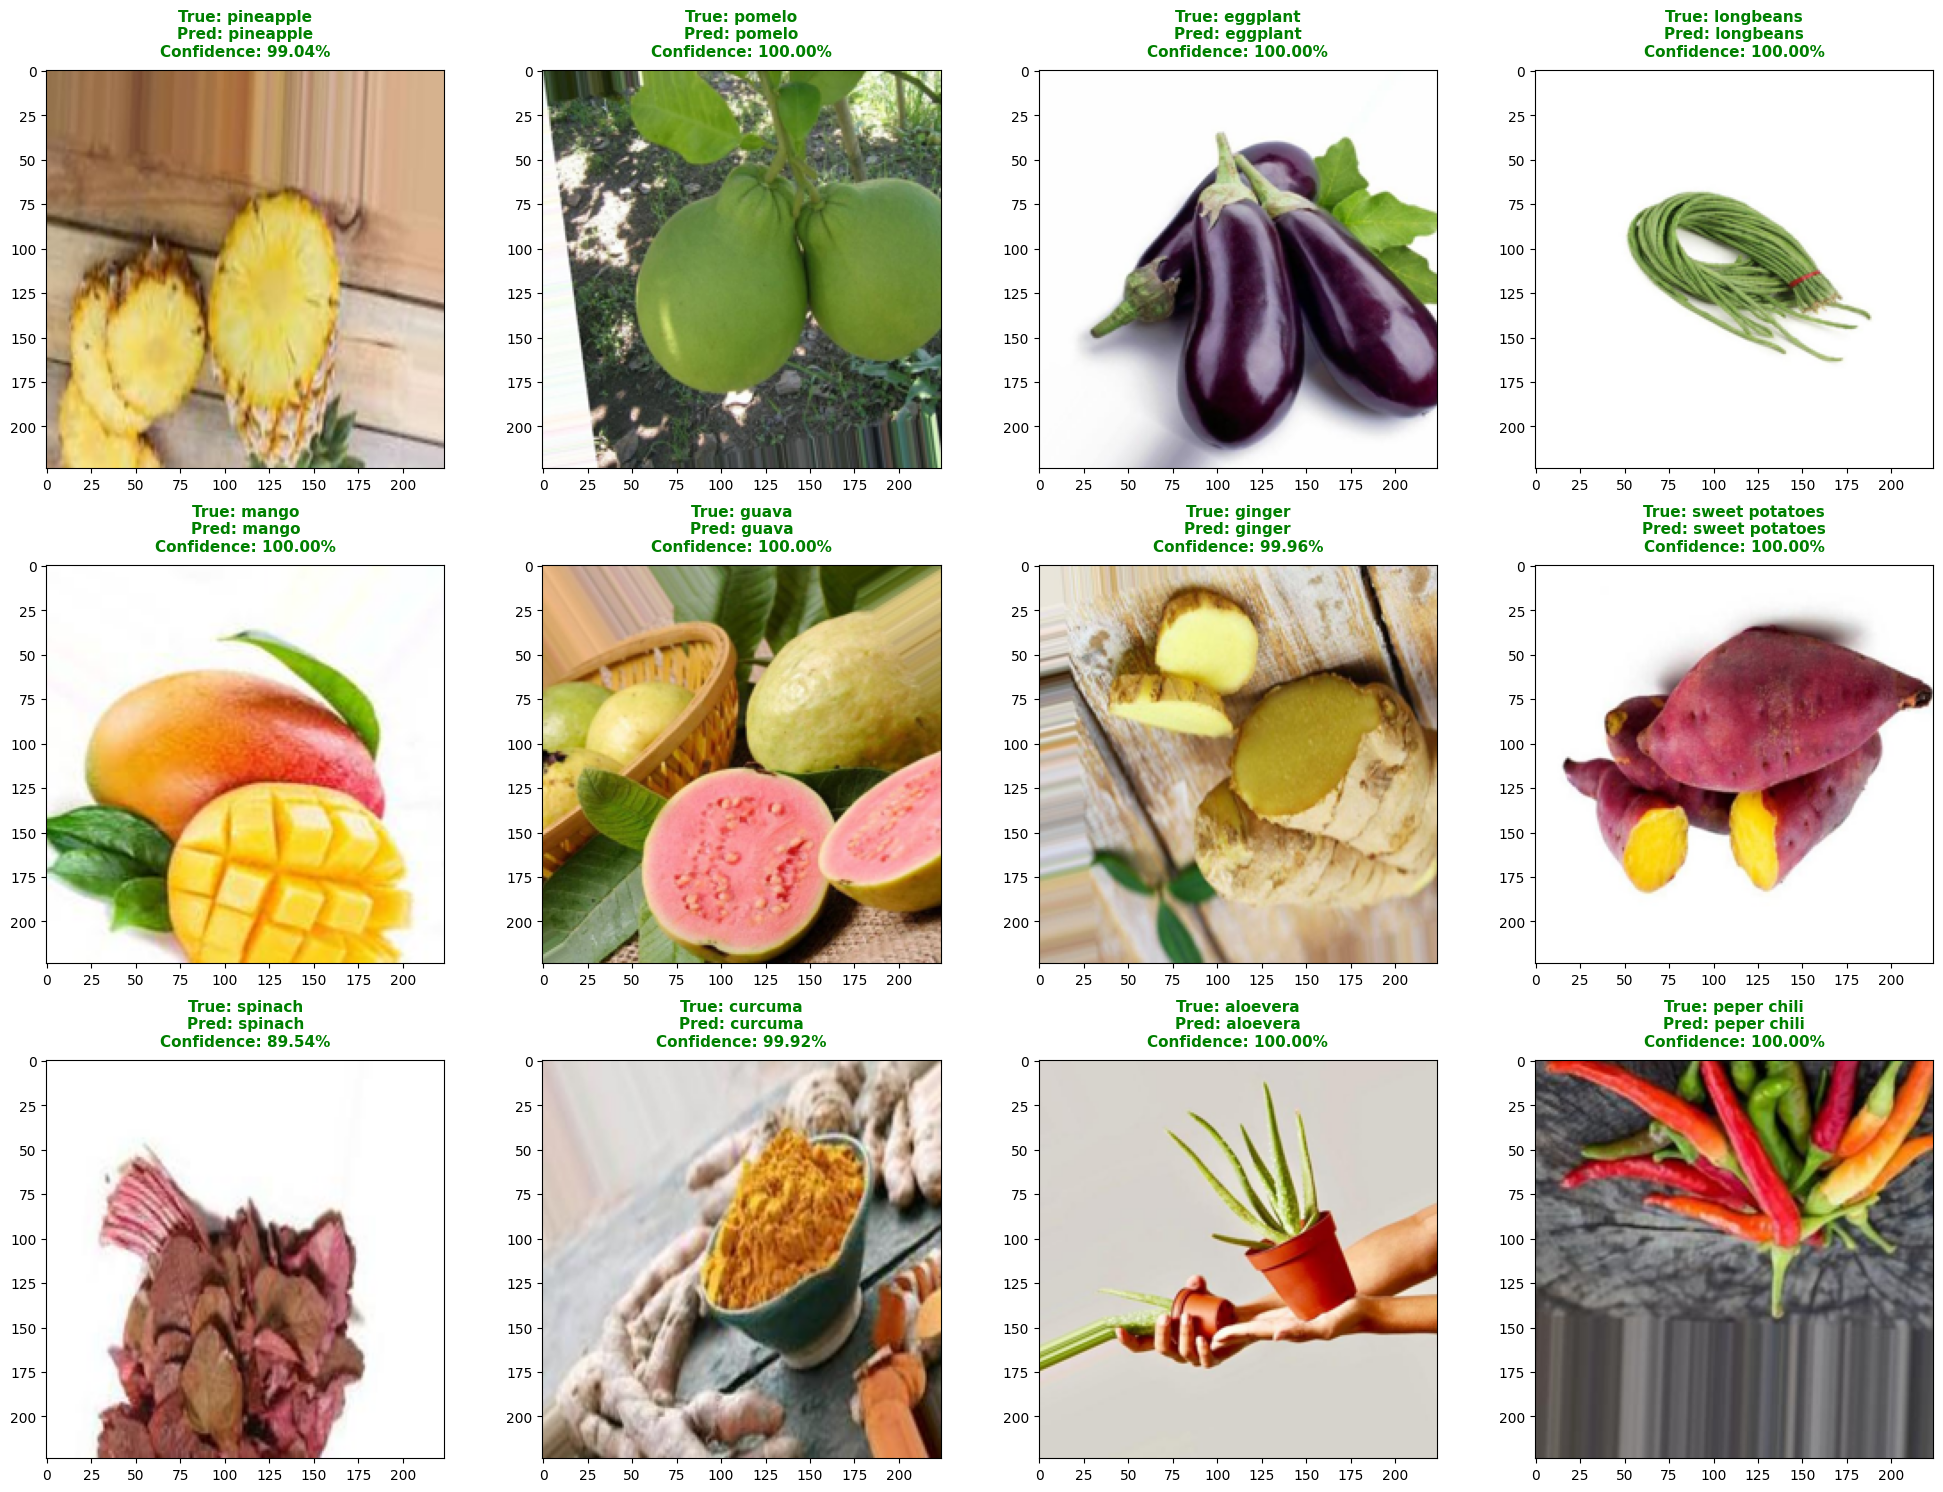

In [48]:
# VISUALISASI HASIL INFERENCE

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

for idx, result in enumerate(results):
    ax = axes[idx]
    
    # Tampilkan gambar
    ax.imshow(result['image'])
    
    # Buat title dengan informasi prediksi
    true_label = result['true_label']
    pred_label = result['pred_label']
    confidence = result['confidence']
    
    # Title utama
    title = f"True: {true_label}\nPred: {pred_label}\nConfidence: {confidence:.2f}%"
    ax.set_title(title, fontsize=11, color=title_color, weight=title_weight, pad=10)
    
plt.tight_layout()
plt.show()

In [45]:
# Requirements.txt
!pip freeze > requirements.txt